In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from scipy.stats import binned_statistic
from scipy.optimize import curve_fit
from scipy.integrate import cumtrapz

import gm2
import trfp
import plotting_functions as plt2
import helper_functions as helper


Welcome to JupyROOT 6.22/02


In [5]:
coll_in = np.genfromtxt('CollimatorInwithBracketpm20cmImages9cmRev03Feb21.csv', delimiter=',', skip_header=1)
coll_out = np.genfromtxt('CollimatorOutwithBracketpm20cmImages9cmRev03Feb21.csv', delimiter=',', skip_header=1)

z_cm = coll_in[:,0]
z_rad = coll_in[:,1]

coll_in = coll_in[:, 2:]/1.45*1e9  # ppb
coll_out = coll_out[:, 2:]/1.45*1e9  # ppb

In [6]:
theta = trfp.THETA_TR

m_in = np.matmul(theta, coll_in.T).T
m_out = np.matmul(theta, coll_out.T).T

In [7]:
full_rad = np.arange(0,2*np.pi, np.mean(np.diff(z_rad)))
full_size = full_rad.size
full_fourth = full_rad.size/5
sim_size = z_rad.shape[0]

full_m = np.zeros((full_size, 17))
for nn in range(5):
    full_m[nn*full_fourth:nn*full_fourth+sim_size, :] = m_in - m_out

In [11]:
out = cumtrapz(full_m, x=full_rad, axis=0)[-1,:]/2/np.pi#61.79/1000.

ii=0
for xx in out:
    if ii == 9: break
    print np.round(xx,3), ',', np.round(np.abs(xx), 3), ',',
    ii += 1

0.339 , 0.339 , 0.08 , 0.08 , 0.188 , 0.188 , 0.135 , 0.135 , 0.142 , 0.142 , 0.312 , 0.312 , -0.087 , 0.087 , -0.338 , 0.338 , -0.025 , 0.025 ,


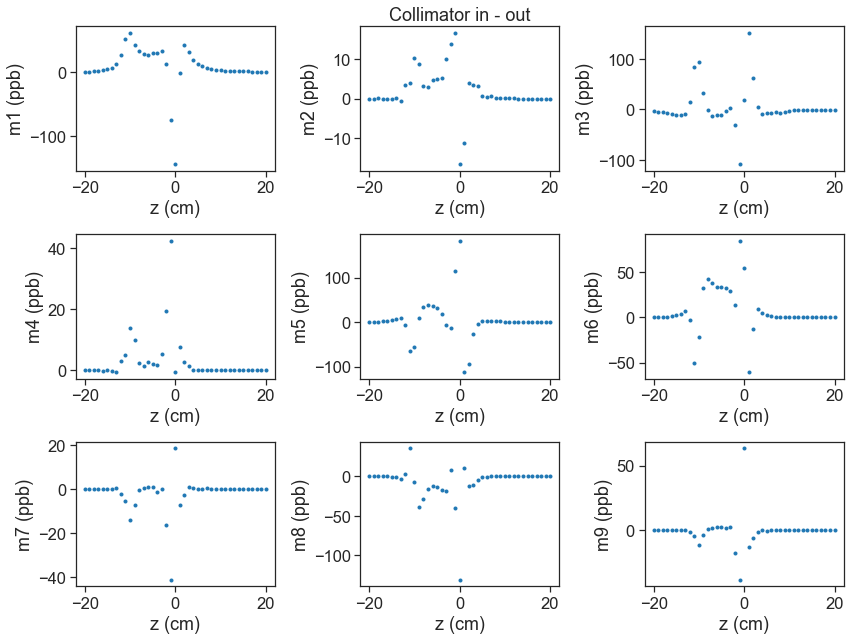

In [17]:
m=0
fig, axs = plt.subplots(3,3)

for row in axs:
    for ax in row:
        ax.plot(z_cm*100, m_in[:,m]-m_out[:,m], '.')
        ax.set_xlabel('z (cm)')
        ax.set_ylabel('m'+str(m+1)+' (ppb)')
        m +=1

axs[0,1].set_title('Collimator in - out')
fig.patch.set_alpha(1)
fig.set_size_inches(12,9)
fig.tight_layout()